<a href="https://colab.research.google.com/github/adityasingh1993/ML-DL-AI-LearnAndTry/blob/main/CV/Digit_Yolov11_ModelTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 14.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/digit_cv/

Booking_Jobs_All_220218.csv.zip  datset_final.zip  Yolov11


In [ ]:
!unzip /content/drive/MyDrive/digit_cv/datset_final.zip

Streaming output truncated to the last 5000 lines.
  inflating: cars_train/labels/01212.txt  
  inflating: cars_train/labels/01214.txt  
  inflating: cars_train/labels/01229.txt  
  inflating: cars_train/labels/01240.txt  
  inflating: cars_train/labels/01245.txt  
  inflating: cars_train/labels/01249.txt  
  inflating: cars_train/labels/01254.txt  
  inflating: cars_train/labels/01260.txt  
  inflating: cars_train/labels/01271.txt  
  inflating: cars_train/labels/01281.txt  
  inflating: cars_train/labels/01292.txt  
  inflating: cars_train/labels/01300.txt  
  inflating: cars_train/labels/01310.txt  
  inflating: cars_train/labels/01347.txt  
  inflating: cars_train/labels/01349.txt  
  inflating: cars_train/labels/01356.txt  
  inflating: cars_train/labels/01367.txt  
  inflating: cars_train/labels/01375.txt  
  inflating: cars_train/labels/01386.txt  
  inflating: cars_train/labels/01392.txt  
  inflating: cars_train/labels/01402.txt  
  inflating: cars_train/labels/01403.txt  
  i

In [ ]:
!wandb login c390076d7aec0d9e888cafa8c1cde06f1d558219

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!wandb enabled

W&B enabled.


In [ ]:
# !tensorboard --logdir "/content/drive/MyDrive/digit_cv/Yolov11"

### Training

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
results = model.train(data="dataset.yaml",project="/content/drive/MyDrive/digit_cv/Yolov11",name="car_detection",optimizer='AdamW',save=True, save_period=10,epochs=100, imgsz=640,verbose=True,label_smoothing=0.1,device='cuda:0')

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=cuda:0, workers=8, project=/content/drive/MyDrive/digit_cv/Yolov11, name=car_detection4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=196

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralyti

train: Scanning /content/cars_train/labels... 12683 images, 0 backgrounds, 1 corrupt: 100%|██████████| 12683/12683 [00:10<00:00, 1154.15it/s]

train: WARNING ⚠️ /content/cars_train/images/07389.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1476]


train: New cache created: /content/cars_train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/cars_valid/labels... 195 images, 0 backgrounds, 0 corrupt: 100%|██████████| 195/195 [00:00<00:00, 1037.93it/s]


val: New cache created: /content/cars_valid/labels.cache
Plotting labels to /content/drive/MyDrive/digit_cv/Yolov11/car_detection4/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/digit_cv/Yolov11/car_detection4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.24G     0.8529      3.784      1.279         33        640: 100%|██████████| 793/793 [01:42<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]


                   all        195        195     0.0035      0.733     0.0234     0.0177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.19G     0.8216      3.388      1.243         23        640: 100%|██████████| 793/793 [01:37<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


                   all        195        195    0.00539      0.897     0.0536     0.0444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.2G     0.7594      3.229      1.201         29        640: 100%|██████████| 793/793 [01:34<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.23it/s]


                   all        195        195    0.00596      0.974     0.0831     0.0683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       3.2G     0.7063      3.114      1.169         29        640: 100%|██████████| 793/793 [01:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.88it/s]


                   all        195        195     0.0437        0.8      0.109     0.0992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       3.2G     0.6847      3.037      1.156         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.27it/s]


                   all        195        195     0.0133      0.477     0.0673     0.0596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.19G     0.6607      2.965      1.138         33        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


                   all        195        195    0.00865      0.979     0.0947     0.0845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       3.2G     0.6377      2.886      1.126         22        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]


                   all        195        195      0.358      0.292      0.147       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.2G      0.628      2.818      1.119         23        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.47it/s]


                   all        195        195      0.522      0.213      0.247      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       3.2G     0.6236      2.758      1.116         27        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


                   all        195        195      0.461       0.23      0.227      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.19G     0.6097      2.676      1.106         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.38it/s]


                   all        195        195      0.394      0.342      0.271      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.2G     0.6038      2.593      1.103         26        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.49it/s]


                   all        195        195      0.419       0.38      0.353      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.2G     0.5937      2.531      1.094         30        640: 100%|██████████| 793/793 [01:33<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.52it/s]


                   all        195        195      0.343      0.403      0.361      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.2G     0.5862      2.464      1.094         23        640: 100%|██████████| 793/793 [01:34<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


                   all        195        195      0.326      0.493      0.383      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       3.2G      0.589      2.405      1.096         19        640: 100%|██████████| 793/793 [01:34<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]


                   all        195        195      0.338      0.554      0.501      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.2G     0.5797       2.33      1.087         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.90it/s]


                   all        195        195      0.359       0.61      0.546      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       3.2G     0.5795      2.283      1.088         30        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.30it/s]


                   all        195        195      0.391      0.595      0.531      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.2G     0.5723      2.207      1.086         27        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.57it/s]


                   all        195        195      0.438      0.607      0.596      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.19G     0.5717      2.152      1.083         27        640: 100%|██████████| 793/793 [01:34<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.46it/s]


                   all        195        195        0.4      0.665      0.624      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.2G     0.5651      2.085      1.079         27        640: 100%|██████████| 793/793 [01:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.52it/s]


                   all        195        195      0.454      0.637      0.684      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.2G     0.5703      2.047      1.085         26        640: 100%|██████████| 793/793 [01:34<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.74it/s]


                   all        195        195      0.528      0.609      0.686      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       3.2G     0.5591      1.973      1.077         27        640: 100%|██████████| 793/793 [01:33<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


                   all        195        195      0.581      0.655      0.691      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.19G     0.5585      1.934      1.077         31        640: 100%|██████████| 793/793 [01:33<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.47it/s]


                   all        195        195      0.488      0.676      0.711      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.2G     0.5541      1.889      1.073         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.63it/s]


                   all        195        195      0.521      0.736      0.785       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.2G     0.5513      1.843      1.071         31        640: 100%|██████████| 793/793 [01:34<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.58it/s]


                   all        195        195      0.634      0.634      0.735      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.2G     0.5514      1.808      1.073         26        640: 100%|██████████| 793/793 [01:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.29it/s]


                   all        195        195      0.496      0.732       0.77      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       3.3G      0.548       1.78      1.071         30        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.31it/s]


                   all        195        195      0.565      0.744      0.794      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.2G     0.5471      1.733      1.067         24        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


                   all        195        195      0.484      0.777      0.786      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.2G     0.5392      1.686      1.065         31        640: 100%|██████████| 793/793 [01:34<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]


                   all        195        195      0.496      0.821      0.817      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       3.2G     0.5385      1.642      1.063         26        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.86it/s]


                   all        195        195      0.547      0.759      0.833      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.19G     0.5381      1.625      1.062         30        640: 100%|██████████| 793/793 [01:35<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


                   all        195        195       0.55      0.807      0.832      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.2G     0.5284      1.604      1.059         24        640: 100%|██████████| 793/793 [01:39<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


                   all        195        195      0.568      0.783      0.848      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.2G     0.5352      1.565       1.06         28        640: 100%|██████████| 793/793 [01:38<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.36it/s]


                   all        195        195      0.619      0.742      0.838      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.2G     0.5303      1.542      1.059         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.79it/s]


                   all        195        195       0.62       0.77      0.852      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.19G     0.5299      1.498      1.061         23        640: 100%|██████████| 793/793 [01:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.62it/s]


                   all        195        195      0.648        0.8       0.86      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       3.2G     0.5318      1.492       1.06         27        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.57it/s]


                   all        195        195      0.651       0.78      0.872      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.2G      0.528      1.457      1.057         30        640: 100%|██████████| 793/793 [01:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


                   all        195        195      0.627      0.803      0.878      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       3.2G     0.5235      1.445      1.057         32        640: 100%|██████████| 793/793 [01:33<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.44it/s]


                   all        195        195      0.644      0.783      0.881      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.19G     0.5207      1.412      1.055         25        640: 100%|██████████| 793/793 [01:34<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.31it/s]


                   all        195        195      0.671      0.804      0.892      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.2G      0.521      1.377      1.052         31        640: 100%|██████████| 793/793 [01:33<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.70it/s]


                   all        195        195      0.649      0.807      0.894      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.2G     0.5183      1.376      1.054         28        640: 100%|██████████| 793/793 [01:34<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.96it/s]


                   all        195        195      0.673      0.811      0.913      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.2G     0.5159      1.346      1.052         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.80it/s]


                   all        195        195      0.641      0.827      0.908      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.19G     0.5116      1.326      1.047         27        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.56it/s]


                   all        195        195      0.697      0.797        0.9      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.2G     0.5103      1.313      1.048         30        640: 100%|██████████| 793/793 [01:33<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.49it/s]


                   all        195        195      0.753      0.804      0.904      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       3.2G     0.5121      1.306      1.048         24        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


                   all        195        195      0.645      0.854      0.913      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.2G     0.5113      1.264       1.05         25        640: 100%|██████████| 793/793 [01:33<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]

                   all        195        195      0.739      0.814      0.921       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.19G     0.5143      1.274       1.05         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.54it/s]


                   all        195        195      0.761      0.797      0.925      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.2G      0.509      1.242      1.046         30        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.79it/s]


                   all        195        195      0.791      0.767       0.94      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.2G     0.5067      1.224      1.046         25        640: 100%|██████████| 793/793 [01:34<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


                   all        195        195       0.76      0.827      0.943       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.2G     0.5022      1.205      1.043         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.61it/s]


                   all        195        195      0.728      0.831      0.944      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.19G     0.5021      1.189      1.042         31        640: 100%|██████████| 793/793 [01:33<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.31it/s]


                   all        195        195      0.763      0.827      0.947      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.2G      0.504      1.184      1.043         31        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.88it/s]


                   all        195        195      0.784      0.813      0.951      0.886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.2G     0.5018       1.17      1.042         32        640: 100%|██████████| 793/793 [01:34<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.51it/s]


                   all        195        195      0.786      0.811       0.95      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.2G        0.5      1.155       1.04         35        640: 100%|██████████| 793/793 [01:34<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.50it/s]


                   all        195        195      0.752      0.822      0.941      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.19G     0.4959      1.137      1.039         28        640: 100%|██████████| 793/793 [01:34<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.69it/s]


                   all        195        195      0.768      0.834      0.949      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       3.2G     0.5019      1.133      1.043         25        640: 100%|██████████| 793/793 [01:34<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.59it/s]


                   all        195        195      0.822      0.805      0.954       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       3.2G     0.4922      1.121      1.038         30        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.55it/s]


                   all        195        195      0.774      0.828      0.953      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       3.2G     0.4931      1.108       1.04         27        640: 100%|██████████| 793/793 [01:33<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.33it/s]


                   all        195        195      0.778      0.831      0.947      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.19G     0.4881      1.088      1.036         35        640: 100%|██████████| 793/793 [01:33<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.46it/s]


                   all        195        195      0.774      0.841      0.954      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.2G     0.4942      1.087       1.04         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.68it/s]


                   all        195        195      0.749      0.867      0.956      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.2G     0.4891      1.063      1.036         29        640: 100%|██████████| 793/793 [01:34<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.81it/s]


                   all        195        195      0.759      0.865      0.962      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       3.2G     0.4892      1.069      1.036         30        640: 100%|██████████| 793/793 [01:34<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.85it/s]


                   all        195        195      0.748      0.858      0.958      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.19G     0.4854      1.049      1.033         21        640: 100%|██████████| 793/793 [01:34<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.64it/s]


                   all        195        195      0.744      0.874      0.961      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.2G     0.4888      1.034      1.034         32        640: 100%|██████████| 793/793 [01:33<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


                   all        195        195      0.768      0.863       0.97      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       3.2G     0.4851      1.029      1.033         28        640: 100%|██████████| 793/793 [01:34<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.62it/s]


                   all        195        195      0.769      0.862      0.971      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.2G     0.4829      1.031      1.036         24        640: 100%|██████████| 793/793 [01:32<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.39it/s]


                   all        195        195      0.769      0.875       0.97      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.19G     0.4818      1.003      1.033         31        640: 100%|██████████| 793/793 [01:32<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.65it/s]


                   all        195        195      0.787      0.866      0.971      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.2G     0.4781     0.9953      1.031         28        640: 100%|██████████| 793/793 [01:32<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.73it/s]


                   all        195        195      0.774      0.872      0.974      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.31G      0.478     0.9889      1.029         34        640: 100%|██████████| 793/793 [01:33<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.69it/s]


                   all        195        195      0.776      0.879      0.977      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.2G     0.4782     0.9763      1.031         22        640: 100%|██████████| 793/793 [01:32<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.62it/s]


                   all        195        195      0.822      0.842      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.19G     0.4801     0.9781      1.032         31        640: 100%|██████████| 793/793 [01:31<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.34it/s]


                   all        195        195      0.838      0.836      0.975      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.2G     0.4732     0.9523      1.027         23        640: 100%|██████████| 793/793 [01:32<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.59it/s]


                   all        195        195      0.853      0.819      0.975      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       3.2G     0.4732     0.9519      1.027         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.82it/s]


                   all        195        195      0.797      0.869      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.2G     0.4751     0.9537      1.029         31        640: 100%|██████████| 793/793 [01:32<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.84it/s]


                   all        195        195      0.793      0.879      0.972      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.19G     0.4673     0.9385      1.024         29        640: 100%|██████████| 793/793 [01:32<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.98it/s]


                   all        195        195      0.807      0.869      0.972      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.2G     0.4706     0.9217      1.026         31        640: 100%|██████████| 793/793 [01:31<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.69it/s]


                   all        195        195      0.817      0.858      0.972      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.2G       0.47     0.9323      1.027         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.53it/s]


                   all        195        195      0.812      0.864      0.972      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.2G     0.4672     0.9124      1.022         27        640: 100%|██████████| 793/793 [01:32<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.82it/s]


                   all        195        195       0.81      0.869      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.19G     0.4697     0.9122      1.028         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.56it/s]


                   all        195        195      0.818      0.864      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.2G      0.469     0.8984      1.023         23        640: 100%|██████████| 793/793 [01:33<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.61it/s]


                   all        195        195      0.852      0.844      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       3.2G     0.4672     0.8884      1.022         33        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.66it/s]


                   all        195        195      0.832      0.857      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       3.2G     0.4681     0.8895      1.024         25        640: 100%|██████████| 793/793 [01:33<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


                   all        195        195      0.836      0.857      0.972      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.19G     0.4661     0.8797      1.025         21        640: 100%|██████████| 793/793 [01:33<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.55it/s]


                   all        195        195      0.835      0.857      0.972      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       3.2G     0.4617     0.8666      1.021         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.57it/s]


                   all        195        195      0.836      0.857      0.972      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       3.2G     0.4627     0.8565      1.022         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.91it/s]


                   all        195        195      0.856      0.845      0.975      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.41G     0.4592     0.8485      1.019         24        640: 100%|██████████| 793/793 [01:33<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.78it/s]


                   all        195        195       0.86       0.84      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.19G     0.4597     0.8436      1.019         20        640: 100%|██████████| 793/793 [01:33<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


                   all        195        195       0.86       0.84      0.975      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       3.2G     0.4594     0.8349      1.019         24        640: 100%|██████████| 793/793 [01:32<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.77it/s]


                   all        195        195      0.862       0.84      0.975      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       3.2G     0.4559      0.826      1.018         29        640: 100%|██████████| 793/793 [01:33<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.71it/s]


                   all        195        195       0.85      0.846      0.975      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       3.2G     0.4511     0.8186      1.014         28        640: 100%|██████████| 793/793 [01:33<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.77it/s]


                   all        195        195      0.852      0.846      0.977      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.19G     0.4547       0.82      1.017         25        640: 100%|██████████| 793/793 [01:33<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.33it/s]


                   all        195        195      0.859      0.846       0.98      0.915
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.2G     0.3774     0.3999      1.001         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


                   all        195        195      0.861      0.851       0.98      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.41G     0.3704     0.3724      0.996         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.75it/s]


                   all        195        195      0.842      0.857       0.98      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       3.2G     0.3664     0.3536     0.9945         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.44it/s]


                   all        195        195      0.846      0.857       0.98      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.19G     0.3627     0.3438      0.991         10        640: 100%|██████████| 793/793 [01:31<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.63it/s]


                   all        195        195      0.851      0.851       0.98      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       3.2G      0.362      0.337     0.9958         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.80it/s]


                   all        195        195      0.859      0.851       0.98      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       3.2G     0.3591     0.3303     0.9913         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.64it/s]


                   all        195        195      0.862      0.846       0.98      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.2G     0.3606     0.3197     0.9871         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


                   all        195        195      0.859      0.846      0.979      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.19G     0.3597     0.3157     0.9896         10        640: 100%|██████████| 793/793 [01:31<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.75it/s]


                   all        195        195      0.854      0.857      0.979      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.2G     0.3577     0.3125     0.9872         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


                   all        195        195       0.85      0.857      0.979      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.2G     0.3564     0.3077     0.9874         10        640: 100%|██████████| 793/793 [01:32<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.54it/s]


                   all        195        195      0.852      0.857      0.979      0.914

100 epochs completed in 2.655 hours.
Optimizer stripped from /content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/last.pt, 5.7MB
Optimizer stripped from /content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt, 5.7MB

Validating /content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,676,676 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


                   all        195        195      0.861      0.851       0.98      0.914
AM General Hummer SUV 2000          1          1      0.861          1      0.995      0.895
   Acura RL Sedan 2012          1          1      0.905          1      0.995      0.995
   Acura TL Sedan 2012          1          1      0.882          1      0.995      0.995
  Acura TL Type-S 2008          1          1       0.96          1      0.995      0.895
  Acura TSX Sedan 2012          1          1       0.94          1      0.995      0.995
Acura Integra Type R 2001          1          1      0.873          1      0.995      0.895
Acura ZDX Hatchback 2012          1          1      0.864          1      0.995      0.995
Aston Martin V8 Vantage Convertible 2012          1          1      0.859          1      0.995      0.995
Aston Martin V8 Vantage Coupe 2012          1          1          1          0      0.995      0.796
Aston Martin Virage Convertible 2012          1          1      0.843  

## Training and Validation BOX Loss



The validation box loss stabilizes early, indicating that the model achieves good generalization for bounding box predictions.
Training Dynamics:

The training loss keeps decreasing, showing the model continues to optimize its predictions on the training set.


The final box loss values are low for both training (~0.36) and validation (~0.42), which suggests that the model predicts bounding boxes accurately.


Since the training and validation box losses remain close throughout the training process, there is no significant overfitting.

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Columns in results.csv: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


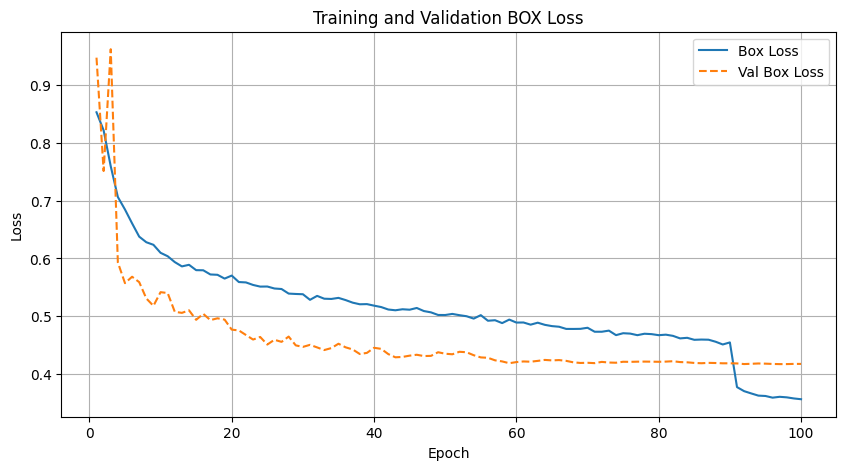

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to YOLOv8 results file
results_csv_path = "/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/results.csv"  # Update with the actual path


# Load the results CSV file

results = pd.read_csv(results_csv_path)
print(results.columns)

# Check the columns in the CSV
print("Columns in results.csv:", results.columns)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/box_loss'], label="Box Loss")

plt.plot(results['epoch'], results['val/box_loss'], label="Val Box Loss", linestyle='dashed')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation BOX Loss")
plt.legend()
plt.grid()
plt.show()




In [ ]:
results.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

## Training and Validation Class Loss

The classification loss reduces very quickly, indicating efficient learning.
The low loss values after stabilization mean the model is performing well in predicting class labels.
The close alignment between training and validation loss demonstrates that the model generalizes well to unseen data without significant overfitting.

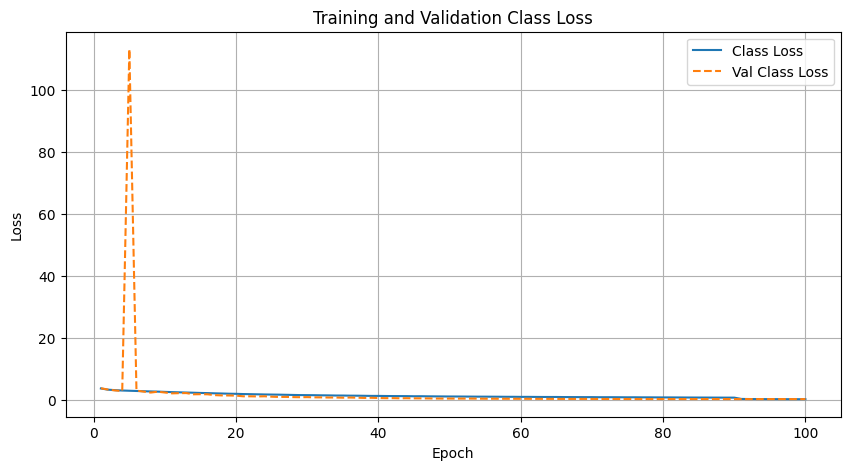

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['train/cls_loss'], label="Class Loss")
plt.plot(results['epoch'], results['val/cls_loss'], label="Val Class Loss", linestyle='dashed')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Class Loss")
plt.legend()
plt.grid()
plt.show()

## Validation mAP Over Epochs

mAP@50 (Blue) reaches a near-perfect value, indicating high performance at IoU=0.50.
mAP@50:95 (Orange) is slightly more challenging but still stabilizes at a high value, suggesting the model generalizes well across IoU thresholds.

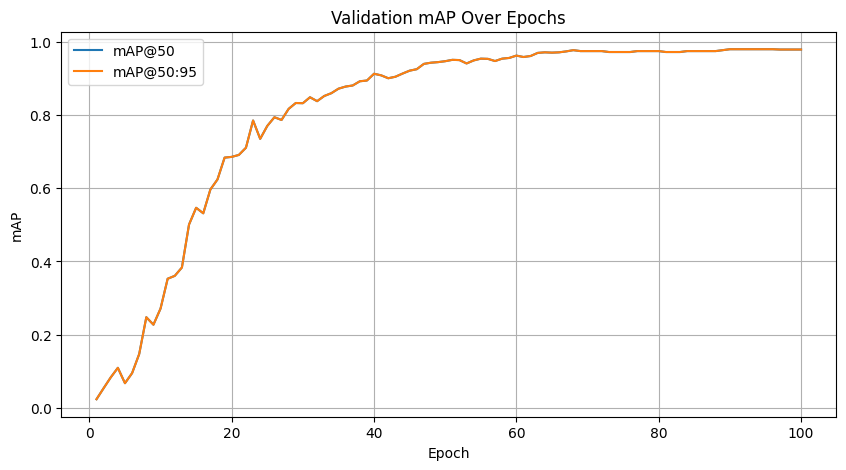

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label="mAP@50")
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label="mAP@50:95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Validation mAP Over Epochs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo export model="/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt" format=onnx

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,676,676 parameters, 0 gradients, 6.8 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 200, 8400) (5.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 319.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 314.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 253.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 242.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 294.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.0s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runt

In [ ]:
!yolo export model="/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt" format=engine

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,676,676 parameters, 0 gradients, 6.8 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 200, 8400) (5.4 MB)
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 284.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 12.9s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success ✅ 14.4s, saved as '/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.onnx' (10.5 MB)
requirements: U

In [ ]:
!yolo export model="/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt" format=tflite

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,676,676 parameters, 0 gradients, 6.8 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/digit_cv/Yolov11/car_detection4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 200, 8400) (5.4 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th